In [1]:
# installing all the necessary libraries
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 6.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.5 MB/s 
  Created wheel for cairocffi: filename=cairocff

In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import glob
import os
from tqdm import tqdm

In [3]:
# Mounting the google drive for dataset access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1 :

In [9]:
# Creating the columns labeled as in the table(AS per in the question) 
df_column = ['Method', 'Subject', 'Acceleometer Axis', 'Average degree', 'Network Diameter ','Average Path length', 'Activity', 'Position']
# Creating a dataframe(df_t1) where all the final output will be present and creating the columns by adding the columns(df_column)
df_t1 = pd.DataFrame(columns=df_column)

In [10]:
# Defining a function to automate the task
# Creating a f2() function which will perform HVG and NVG. It will also calculate the Average degree, Network Diameter, Average Path length. 
def f2(s):
  # Creating the columns labeled as in the table(AS per in the question) 
  df_column = ['Method', 'Subject', 'Acceleometer Axis', 'Average degree', 'Network Diameter','Average Path length', 'Activity', 'Position']  
  # Creating a dataframe with the columns are created above
  df_temp_t1 = pd.DataFrame(columns=df_column)
  # list of all the Accelerometer axis
  attr=['attr_x','attr_y','attr_z']
  # strr contains filename along with '/' for filepath convinence
  strr = s + '/'
  # In path2 the path of files stored in google drive
  path2 = r'/content/drive/MyDrive/proj/fda/'
  # Complete path for reading the csv files
  path2 = path2 + strr
  # all_file contain all the files of the directory
  all_file = glob.glob(os.path.join(path2 , "*.csv"))
  # List of all CSVs( as dataframes are stored in this list) 
  li = []
  # This loops goes through all the CSV files and convert them into dataframe
  for filename in all_file:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
  # to print the length of the file
  print(len(li))

  # this loop performs the NVG and HVG of each dataframe and also show the progress bar
  for i in tqdm(range(0, len(li))):
    for z in attr:
        g1 = NaturalVG()
        g1.build(li[i].loc[1000:2024, z]) # building NVG model with sample size of 1024 data points 
        ig_g1 = g1.as_igraph()

        AD1 = np.mean(ig_g1.degree()) # calculating the average degree of NVG
        ND1 = ig_g1.diameter()  # calculating the network diameter of NVG
        APL1 = ig_g1.average_path_length() # calculating the average path length of NVG

        g2 = HorizontalVG()
        g2.build(li[i].loc[1000:2024, z]) # building HVG model with sample size of 1024 data points
        ig_g2 = g2.as_igraph()

     
        AD2 = np.mean(ig_g2.degree()) # calculating the average degree of HVG
        ND2 = ig_g2.diameter() # calculating the network diameter of HVG
        APL2 = ig_g2.average_path_length() # calculating the average path length of HVG

        # The following few lines is for assigning action and position for each row based on the filename
        ac = ''
        pos = ''
        if (all_file[i].find('walking')) != -1 :
          ac = ac + 'walk'
        if (all_file[i].find('running')) != -1:
          ac = ac + 'run'
        if (all_file[i].find('up')) != -1:
          ac = ac + 'climb-up'
        if (all_file[i].find('down')) != -1:
           ac = ac + 'climb-down'
        if (all_file[i].find('chest')) != -1:
            pos = pos + 'chest'
        if (all_file[i].find('head')) != -1:
            pos = pos + 'head'


        # Creating a new dataframe(as a table as mentioned in question) with required values for NVG
        df1 = {'Method': 'NVG' , 'Subject': s, 'Acceleometer Axis':z, 'Average degree':AD1, 'Network Diameter':ND1, 'Average Path length':APL1, 'Activity':ac, 'Position':pos}
        # Creating a new dataframe(as a table as mentioned in question) with required values for HVG
        df2 = {'Method': 'HVG' , 'Subject': s, 'Acceleometer Axis':z, 'Average degree':AD2, 'Network Diameter':ND2, 'Average Path length':APL2, 'Activity':ac, 'Position':pos}
        df_temp_t1 = df_temp_t1.append(df1, ignore_index = True)
        df_temp_t1 = df_temp_t1.append(df2, ignore_index = True)



  return df_temp_t1

In [11]:
# df is for each of the subjects

df = [f2('s1'), f2('s2'), f2('s3'), f2('s4'), f2('s5'), f2('s6'), f2('s7'), f2('s8'), f2('s9'), f2('s10'), f2('s11'), f2('s12'), f2('s13'), f2('s14'), f2('s15')]
# creating a new dataframe which includes all the subjects with its computed HVG, NVG values. 
df_t1 = pd.concat(df, axis=0, ignore_index=True)

8


100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.64it/s]


16


100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


8


100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


16


100%|██████████| 16/16 [00:09<00:00,  1.70it/s]


8


100%|██████████| 8/8 [00:05<00:00,  1.53it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


8


100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


16


100%|██████████| 16/16 [00:09<00:00,  1.70it/s]


8


100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


In [12]:
# Printing the Final Table(as mentioned in the question)
df_t1

,Method,Subject,Acceleometer Axis,Average degree,Network Diameter,Average Path length,Activity,Position
0,NVG,s1,attr_x,15.375610,7,3.884583,climb-up,chest
1,HVG,s1,attr_x,3.959024,35,15.412540,climb-up,chest
2,NVG,s1,attr_y,16.325854,10,4.482452,climb-up,chest
3,HVG,s1,attr_y,3.953171,33,14.398880,climb-up,chest
4,NVG,s1,attr_z,9.957073,10,4.634832,climb-up,chest
...,...,...,...,...,...,...,...,...
859,HVG,s15,attr_x,3.960976,24,11.640945,climb-up,chest
860,NVG,s15,attr_y,13.734634,11,5.267243,climb-up,chest
861,HVG,s15,attr_y,3.945366,32,13.800284,climb-up,chest
862,NVG,s15,attr_z,10.126829,10,4.768316,climb-up,chest


In [14]:
# Dataframe df_w has all the rows of walk
df_w = df_t1[((df_t1['Activity']=='walk'))]
# Dataframe df_r has all the rows of run
df_r = df_t1[((df_t1['Activity']=='run'))]

In [15]:
# Concatinating the two dataframes in the above in a new dataframe(df_wr) that will be used for ploting for running and walking activities
temp_wr = [df_w, df_r]
df_wr = pd.concat(temp_wr, axis=0, ignore_index=True)
df_wr

,Method,Subject,Acceleometer Axis,Average degree,Network Diameter,Average Path length,Activity,Position
0,NVG,s1,attr_x,11.443902,10,4.446633,walk,chest
1,HVG,s1,attr_x,3.957073,26,11.584668,walk,chest
2,NVG,s1,attr_y,11.986341,9,4.244055,walk,chest
3,HVG,s1,attr_y,3.953171,22,10.673826,walk,chest
4,NVG,s1,attr_z,8.569756,10,4.899920,walk,chest
...,...,...,...,...,...,...,...,...
355,HVG,s15,attr_x,3.964878,18,7.631580,run,head
356,NVG,s15,attr_y,8.335610,11,5.193813,run,head
357,HVG,s15,attr_y,3.951220,23,8.284708,run,head
358,NVG,s15,attr_z,8.454634,10,4.787971,run,head


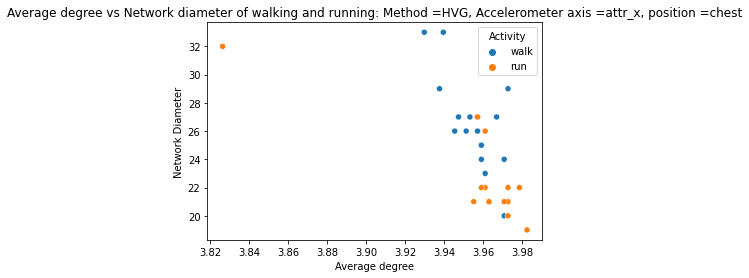

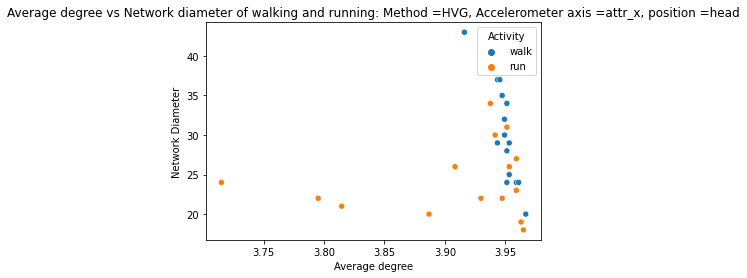

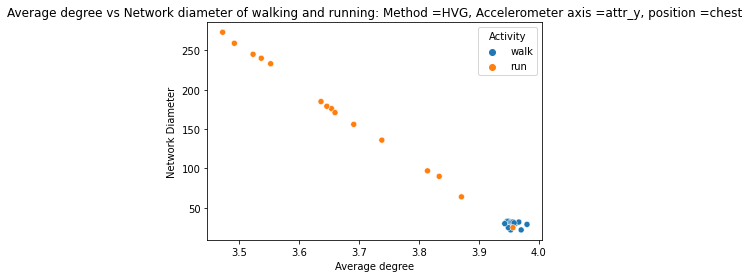

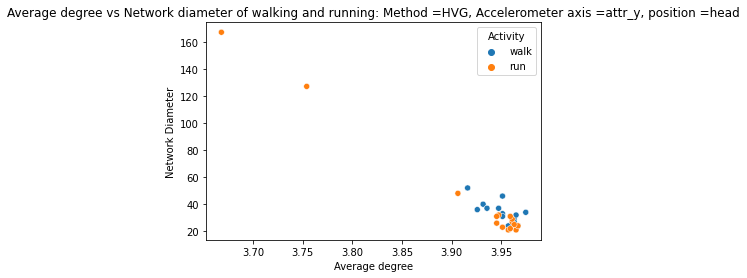

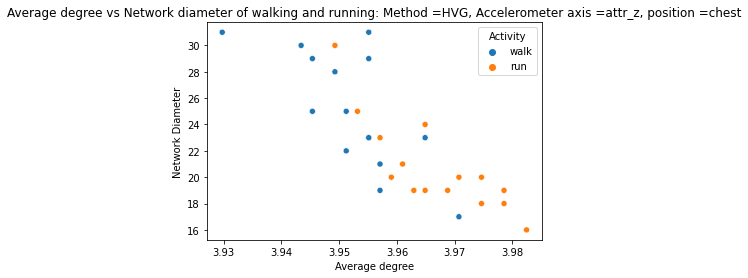

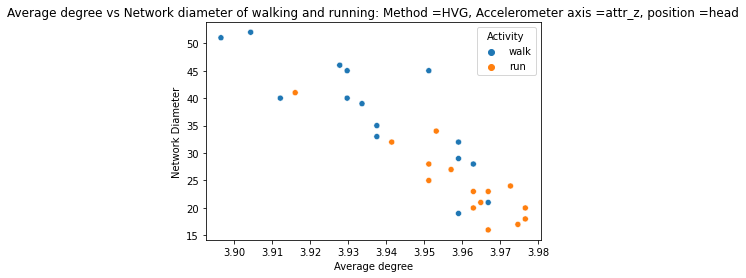

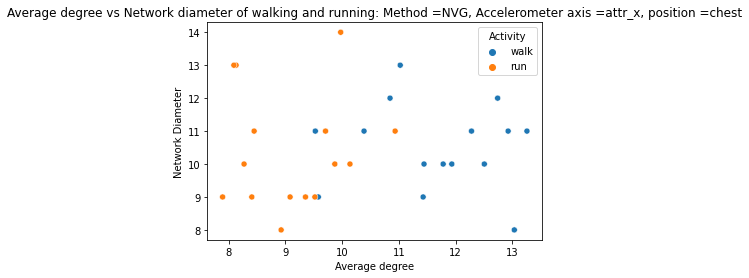

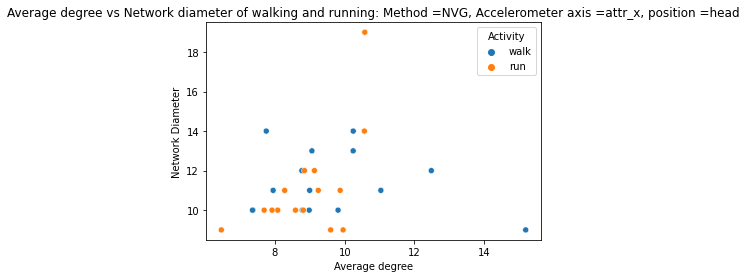

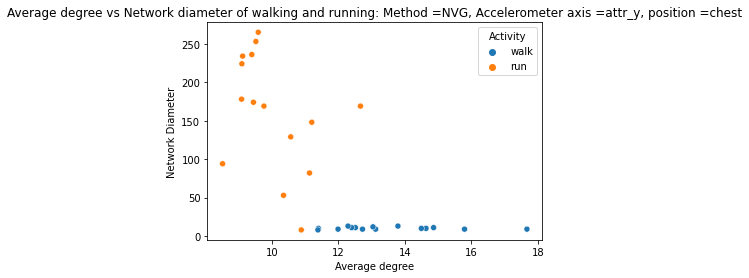

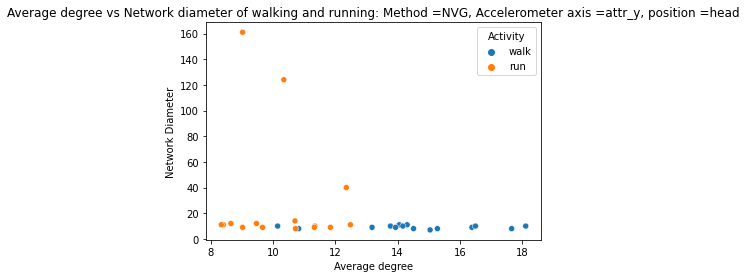

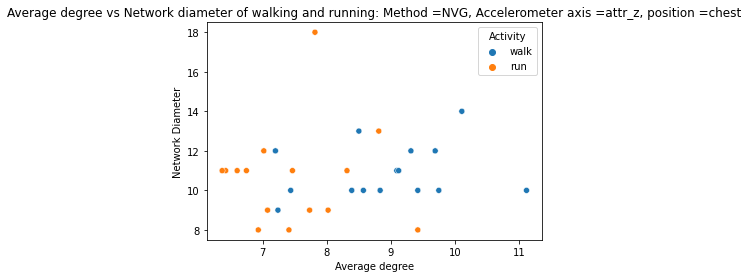

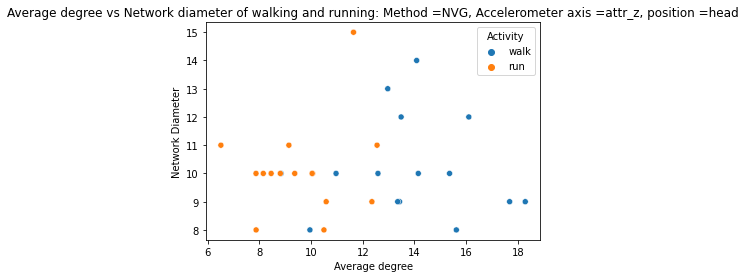

In [20]:
''' Generating the Scatter Plots: average degree vs network diameter and color the points
according to walking and running (do this for each accelerometer signal and
each method (HVH and NVG))  '''

pos = ['chest','head']
method = ['HVG','NVG']
axiss = ['attr_x', 'attr_y', 'attr_z']
for i in method:
  for j in axiss:
    for k in pos:
      df_graph = df_wr[((df_wr['Position'] == k) &(df_wr['Method']==i) & (df_wr['Acceleometer Axis']==j))]
      
      sns.scatterplot(data=df_graph, x='Average degree', y='Network Diameter', hue='Activity')

      plt.title("Average degree vs Network diameter of walking and running: Method =" + str(i) + ", Accelerometer axis =" + str(j) + ", position =" + str(k))
      plt.show()

In [21]:
# Dataframe df_cu has all the rows of Climbing Up
df_cu = df_t1[((df_t1['Activity']=='climb-up'))]
# Dataframe df_cd has all the rows of Climbing Down
df_cd = df_t1[((df_t1['Activity']=='climb-down'))]

In [22]:
# Concatinating the two dataframes in the above in a new dataframe(df_cucd) that will be used for ploting for Climbing Up and Climbing Down activities
temp_cucd = [df_cu, df_cd]
df_cucd = pd.concat(temp_cucd, axis=0, ignore_index=True)
df_cucd

,Method,Subject,Acceleometer Axis,Average degree,Network Diameter,Average Path length,Activity,Position
0,NVG,s1,attr_x,15.375610,7,3.884583,climb-up,chest
1,HVG,s1,attr_x,3.959024,35,15.412540,climb-up,chest
2,NVG,s1,attr_y,16.325854,10,4.482452,climb-up,chest
3,HVG,s1,attr_y,3.953171,33,14.398880,climb-up,chest
4,NVG,s1,attr_z,9.957073,10,4.634832,climb-up,chest
...,...,...,...,...,...,...,...,...
499,HVG,s15,attr_x,3.949268,33,13.936033,climb-down,chest
500,NVG,s15,attr_y,14.146341,15,5.850208,climb-down,chest
501,HVG,s15,attr_y,3.939512,32,13.600030,climb-down,chest
502,NVG,s15,attr_z,8.975610,10,4.670274,climb-down,chest


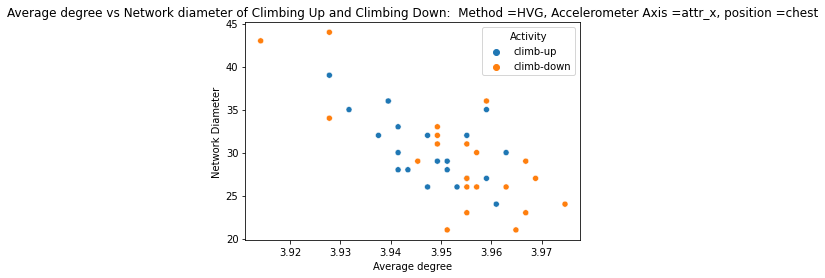

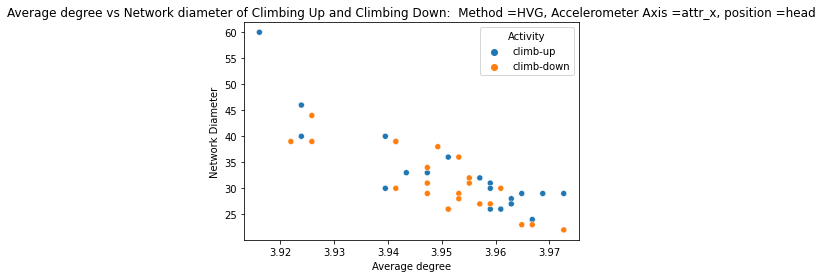

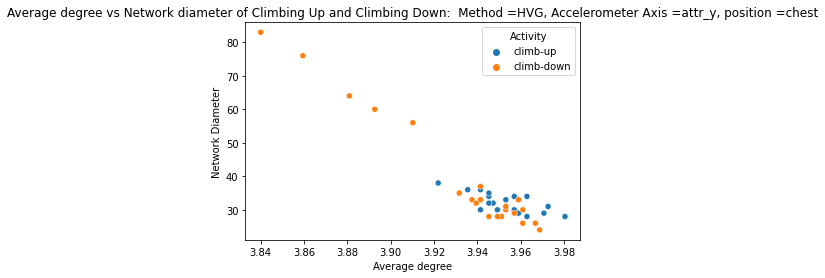

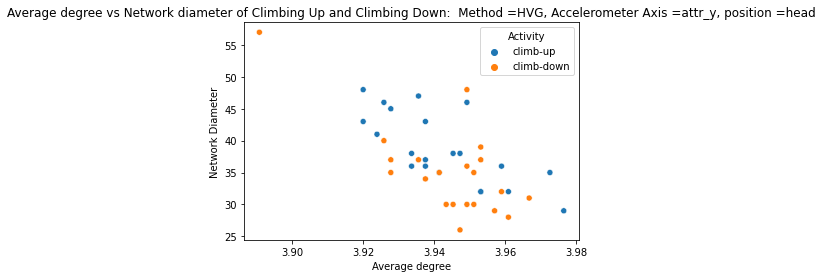

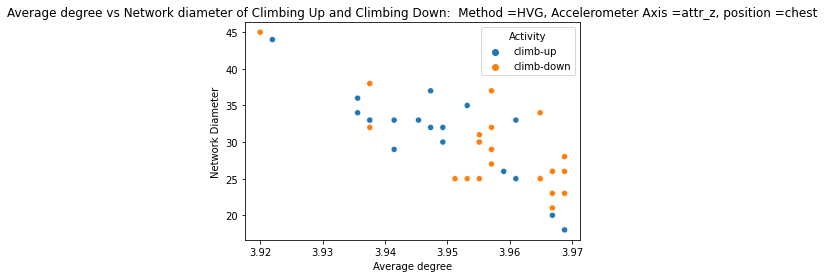

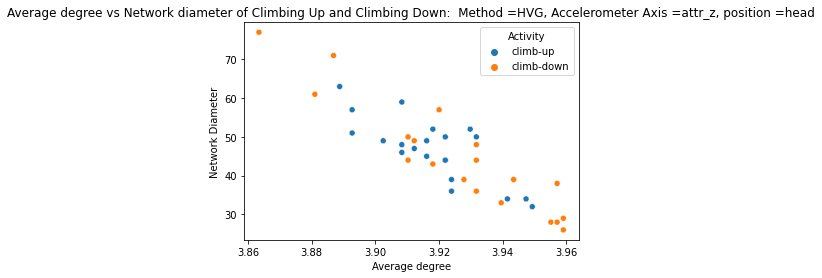

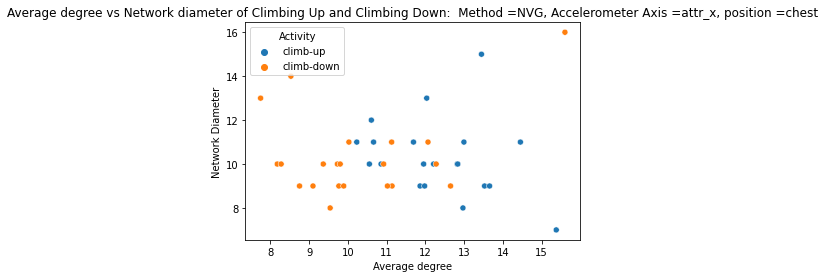

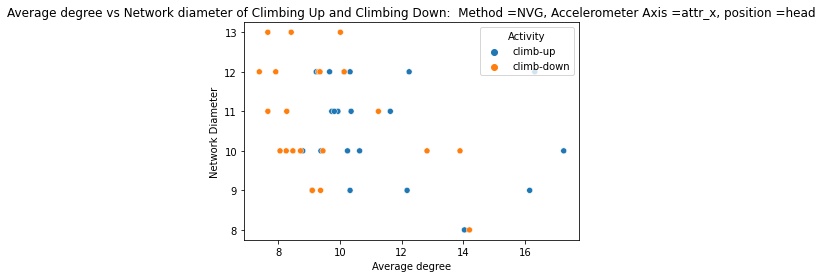

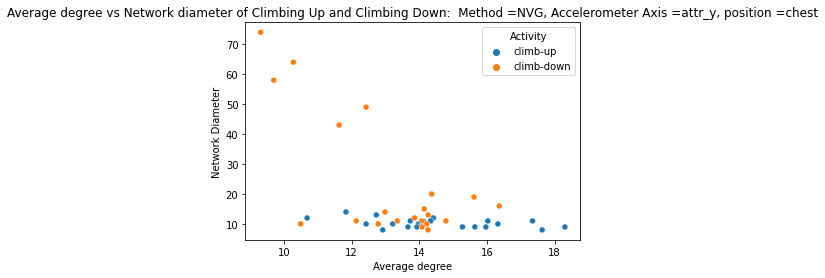

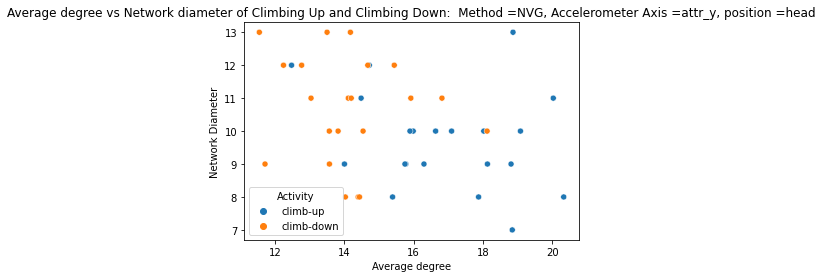

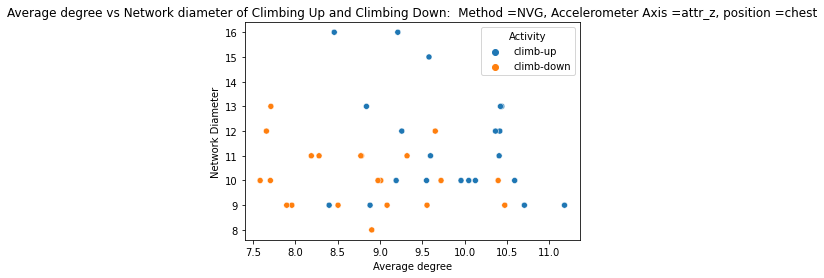

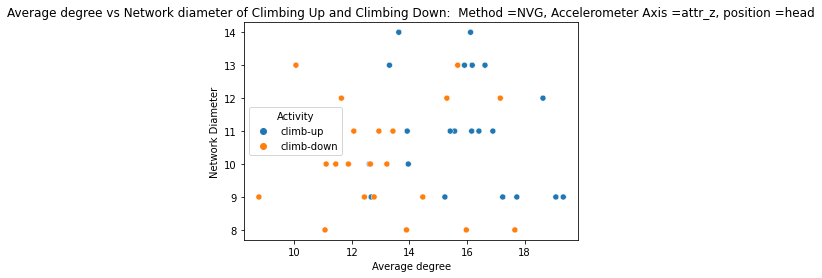

In [23]:
''' Genetraing the Scatter Plots : Generate  scatter plots: average degree vs network diameter and color the points
according to climbing up and climbing down (do this for each accelerometer
signal and each method (HVH and NVG))'''

pos = ['chest','head']
method = ['HVG','NVG']
axiss = ['attr_x', 'attr_y', 'attr_z']
for i in method:
  for j in axiss:
    for k in pos:
      df_graph = df_cucd[((df_cucd['Position'] == k) &(df_cucd['Method']==i) & (df_cucd['Acceleometer Axis']==j))]
      
      sns.scatterplot(data=df_graph, x='Average degree', y='Network Diameter', hue='Activity')

      plt.title("Average degree vs Network diameter of Climbing Up and Climbing Down:  Method =" + str(i) + ", Accelerometer Axis =" + str(j) + ", position =" + str(k))
      plt.show()

## Task 2:

In [24]:
# Creating the columns labeled as in the table(AS per in the question)
df_columns = ['subject', 'axis', 'signal', 'dimension', 'delay', 'PE', 'Complexity', 'Action', 'Position']
# Creating a dataframe(df_final) where all the final output will be present and creating the columns by adding the columns(df_columns)
df_final = pd.DataFrame(columns=df_columns)

In [26]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [27]:
#defining a function to automate the process

def f1(s):
  # columns for our data frame (table as per question)
  df_columns = ['subject', 'axis', 'signal', 'dimension', 'delay','PE', 'Complexity', 'Action', 'Position']  

  df_temp = pd.DataFrame(columns=df_columns)   #creating a dataframe with the columns as created above

  strr = s + '/'                         # strr contains filename along with "/" for filepath convinience
  path1 = r'/content/drive/MyDrive/proj/fda/' # path of files stored in google drive 
  path1 = path1 + strr                   # complete path for reading the csv files 
  all_files = glob.glob(os.path.join(path1 , "*.csv"))   #all files contains all the files of that directory

  #print(all_files)

  li = []   # list of all csvs (as data frames are stored in this list)

   # this for loop goes through the entire files and converts all csvs into data frames
  for filename in all_files:                                    
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df+6)

  axiss = ['attr_x', 'attr_y', 'attr_z']        # list of all axis
  dimension = [3, 4, 5, 6]                    # list of all dimensions
  delay = [1, 2, 3]                           # list of delay
  signal = [1024, 2048, 4096]                 # list of signals
  
  #multiple for loops to get through all the possible combintaions above

  for i in range(0, len(li)):
    for ax in axiss:
      for di in dimension:
        for de in delay:
          for si in signal:
            x = ordinal_patterns(li[i]['attr_x'][:si], di, de)   #computing ordinal patterns
            pe = p_entropy(x)               # calculating he permuation entropy
            cc = complexity(x)              #calculating complexity

            # the following few lines is for assigning action and position for each row based on the filename
            ac = ''
            pos = ''
            if (all_files[i].find('walking')) != -1 :
              ac = ac + 'walk'
            if (all_files[i].find('running')) != -1:
              ac = ac + 'run'
            if (all_files[i].find('up')) != -1:
              ac = ac + 'climb-up'
            if (all_files[i].find('down')) != -1:
              ac = ac + 'climb-down'
            if (all_files[i].find('chest')) != -1:
              pos = pos + 'chest'
            if (all_files[i].find('head')) != -1:
              pos = pos + 'head'

            #creating a new data frame (as a table as mentioned in question) with required values 
            df_t = {'subject':s , 'axis':ax, 'signal':si, 'dimension':di, 'delay':de, 'PE':pe, 'Complexity':cc, 'Action':ac, 'Position':pos}
            df_temp = df_temp.append(df_t, ignore_index = True)       

      
  return df_temp

In [28]:
# frames are for each of the subjects

frames = [f1('s1'), f1('s2'), f1('s3'), f1('s4'), f1('s5'), f1('s6'), f1('s7'), f1('s8'), f1('s9'), f1('s10'), f1('s11'), f1('s12'), f1('s13'), f1('s14'), f1('s15')]

#creating a new data frame which includes all of the subjects

df_final = pd.concat(frames, axis=0, ignore_index=True)

df_final

,subject,axis,signal,dimension,delay,PE,Complexity,Action,Position
0,s1,attr_x,1024,3,1,0.895982,0.089954,climb-up,chest
1,s1,attr_x,2048,3,1,0.857531,0.118556,climb-up,chest
2,s1,attr_x,4096,3,1,0.838023,0.132104,climb-up,chest
3,s1,attr_x,1024,3,2,0.956601,0.040266,climb-up,chest
4,s1,attr_x,2048,3,2,0.935068,0.058651,climb-up,chest
...,...,...,...,...,...,...,...,...,...
15547,s15,attr_z,2048,6,2,0.847533,0.239257,climb-up,chest
15548,s15,attr_z,4096,6,2,0.822386,0.276158,climb-up,chest
15549,s15,attr_z,1024,6,3,0.937143,0.114843,climb-up,chest
15550,s15,attr_z,2048,6,3,0.912299,0.161161,climb-up,chest


In [29]:
#data frame filtered for walk and signal and delay
df_graph11 = df_final[((df_final['signal']==4096) & (df_final['delay']==1) & (df_final['Action']=='walk'))]  
#data frame filtered for run and signal and delay
df_graph12 = df_final[((df_final['signal']==4096) & (df_final['delay']==1) & (df_final['Action']=='run'))]  

In [30]:
#concatinating both the dataframe
temp = [df_graph11, df_graph12]
df_graph1 = pd.concat(temp, axis=0, ignore_index=True)
df_graph1

,subject,axis,signal,dimension,delay,PE,Complexity,Action,Position
0,s1,attr_x,4096,3,1,0.830818,0.136888,walk,chest
1,s1,attr_x,4096,4,1,0.760063,0.226481,walk,chest
2,s1,attr_x,4096,5,1,0.743251,0.288125,walk,chest
3,s1,attr_x,4096,6,1,0.782974,0.287738,walk,chest
4,s1,attr_y,4096,3,1,0.830818,0.136888,walk,chest
...,...,...,...,...,...,...,...,...,...
715,s15,attr_y,4096,6,1,0.797082,0.275827,run,head
716,s15,attr_z,4096,3,1,0.891065,0.089048,run,head
717,s15,attr_z,4096,4,1,0.812657,0.200064,run,head
718,s15,attr_z,4096,5,1,0.788513,0.254259,run,head


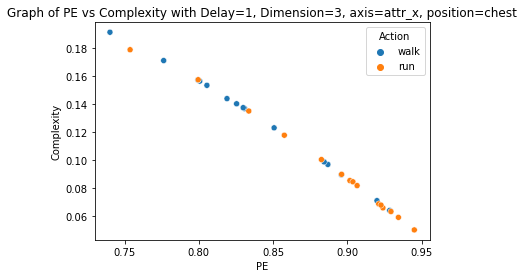

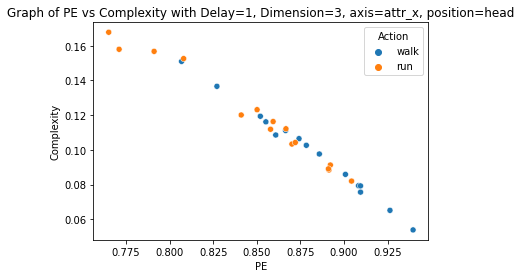

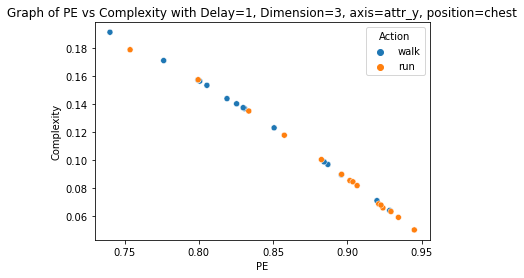

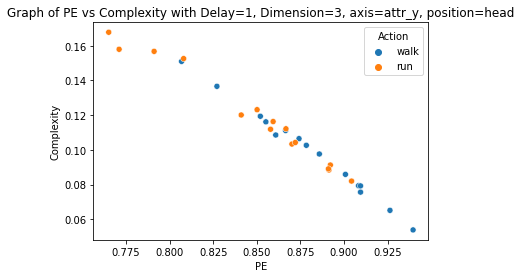

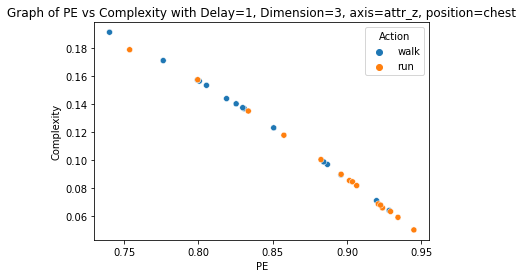

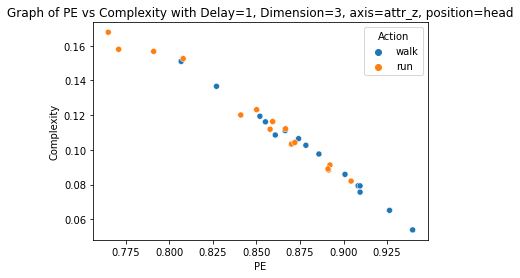

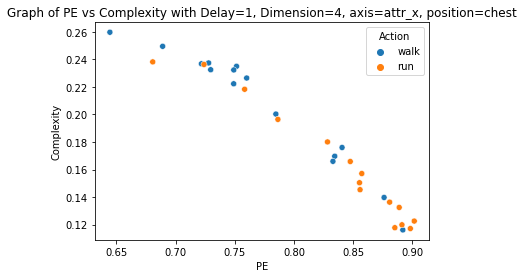

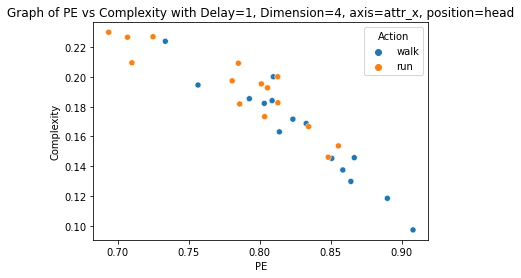

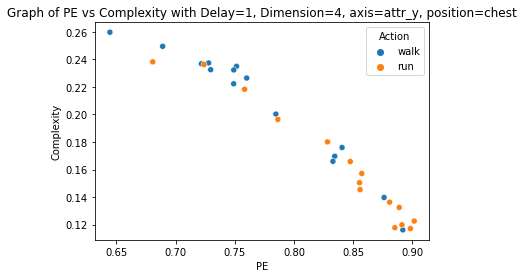

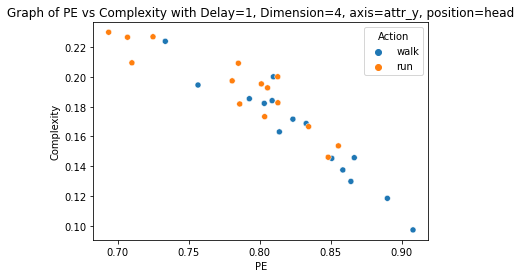

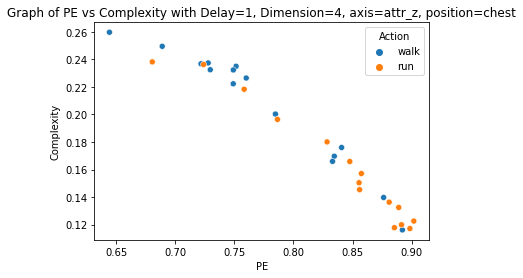

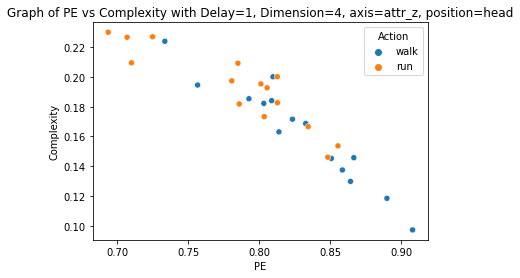

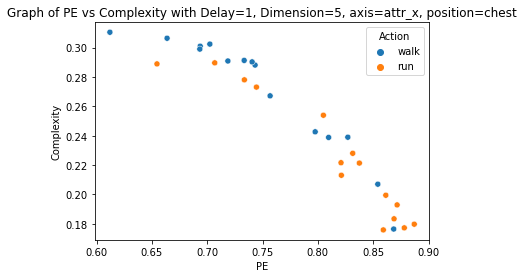

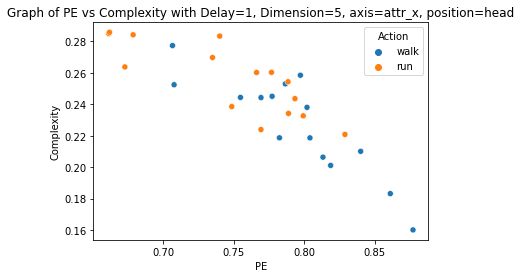

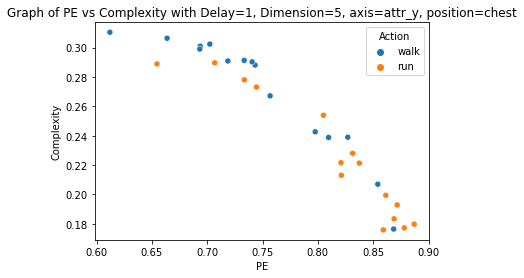

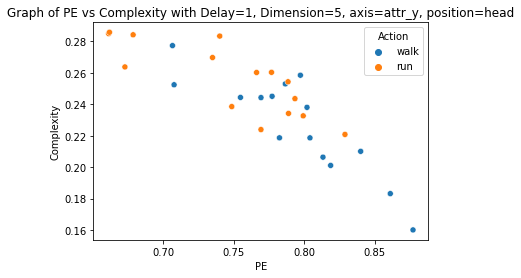

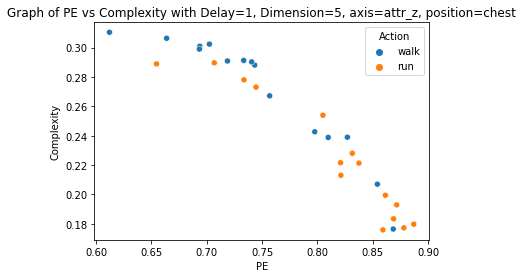

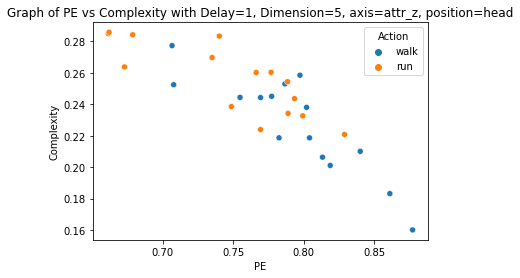

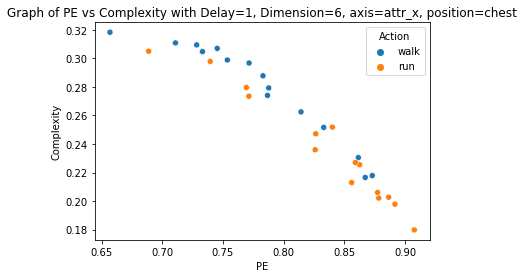

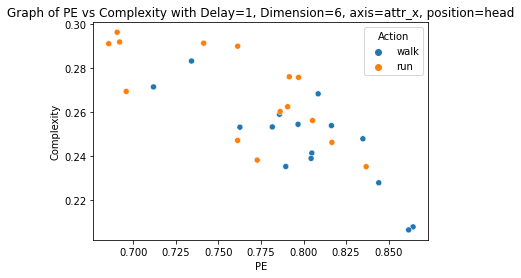

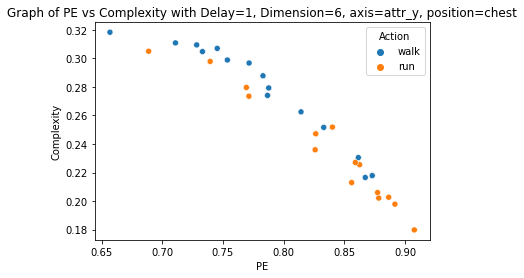

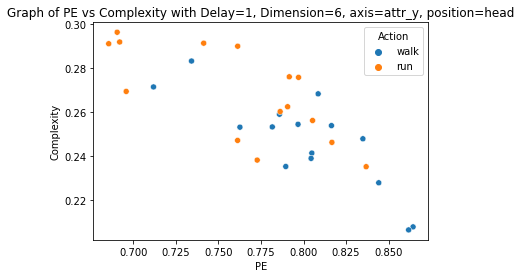

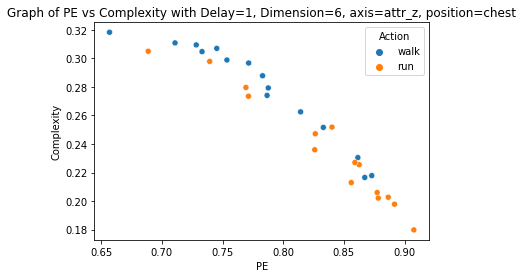

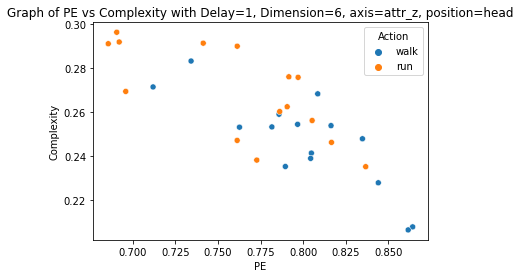

In [31]:
''' Generating the scatter plots:  permutation entropy vs complexity and coloring the points
according to walking and running (for signal length =4096, embedded delay = 1,
and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions) '''
positionn = ['chest', 'head']
dimension = [3,4,5,6]
axiss = ['attr_x', 'attr_y', 'attr_z']
count = 0
for i in dimension:
  for j in axiss:
    for k in positionn:
      df_graph = df_graph1[((df_graph1['dimension']==i) & (df_graph1['axis']==j) & (df_graph1['Position']==k))]
      sns.scatterplot(data=df_graph, x='PE', y='Complexity', hue='Action')
      plt.title("Graph of PE vs Complexity with Delay=1, Dimension=" + str(i) + ", axis=" + str(j) + ", position=" + str(k))
      plt.show()


In [32]:
df_graph21 = df_final[((df_final['signal']==4096) & (df_final['delay']==1) & (df_final['Action']=='climb-down'))]
df_graph22 = df_final[((df_final['signal']==4096) & (df_final['delay']==1) & (df_final['Action']=='climb-up'))]

In [33]:
temp2 = [df_graph21, df_graph22]
df_graph2 = pd.concat(temp2, axis=0, ignore_index=True)
df_graph2

,subject,axis,signal,dimension,delay,PE,Complexity,Action,Position
0,s1,attr_x,4096,3,1,0.797726,0.158015,climb-down,chest
1,s1,attr_x,4096,4,1,0.719532,0.241068,climb-down,chest
2,s1,attr_x,4096,5,1,0.696197,0.300358,climb-down,chest
3,s1,attr_x,4096,6,1,0.735716,0.304858,climb-down,chest
4,s1,attr_y,4096,3,1,0.797726,0.158015,climb-down,chest
...,...,...,...,...,...,...,...,...,...
1003,s15,attr_y,4096,6,1,0.679276,0.320549,climb-up,chest
1004,s15,attr_z,4096,3,1,0.759057,0.181154,climb-up,chest
1005,s15,attr_z,4096,4,1,0.671284,0.253955,climb-up,chest
1006,s15,attr_z,4096,5,1,0.641056,0.309119,climb-up,chest


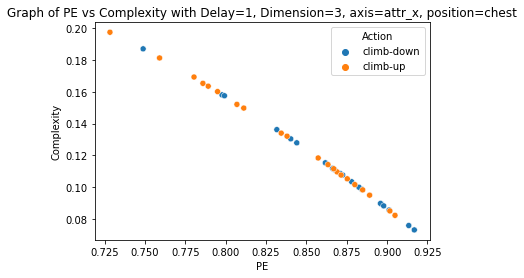

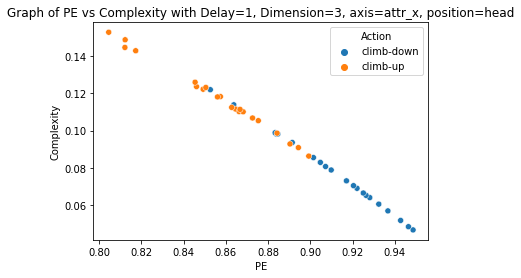

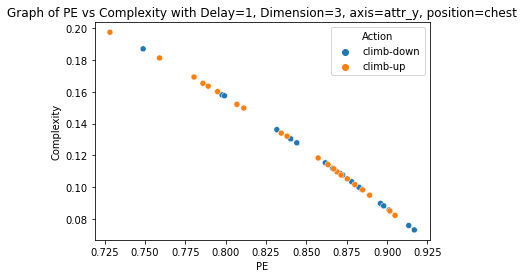

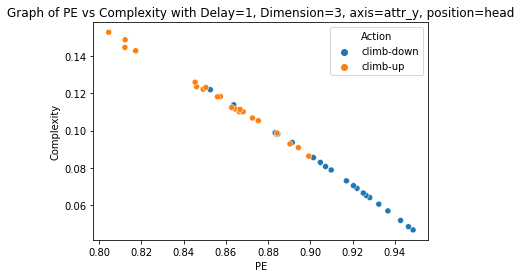

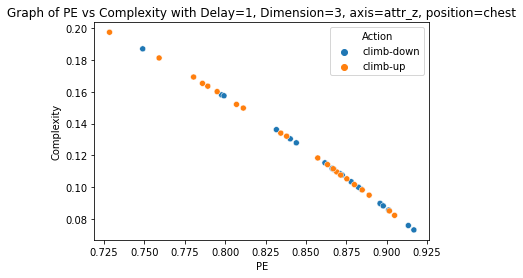

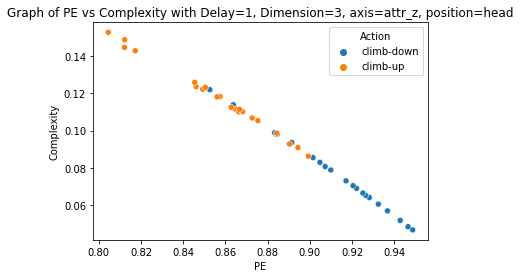

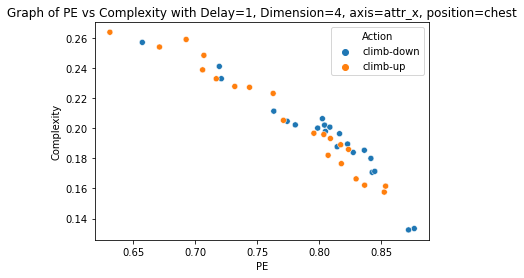

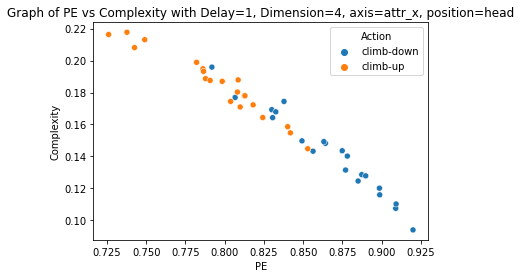

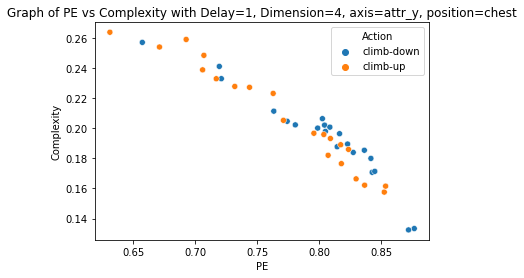

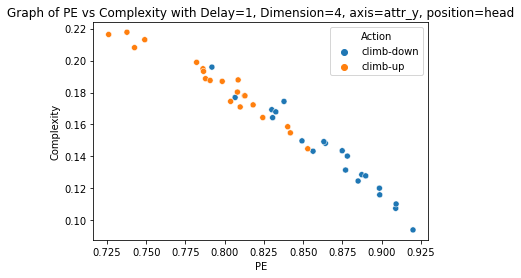

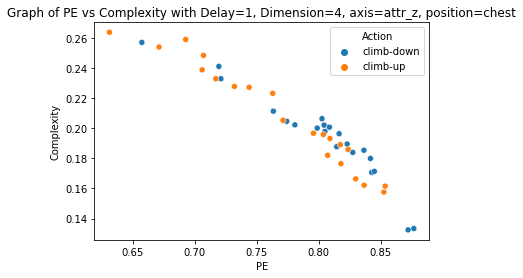

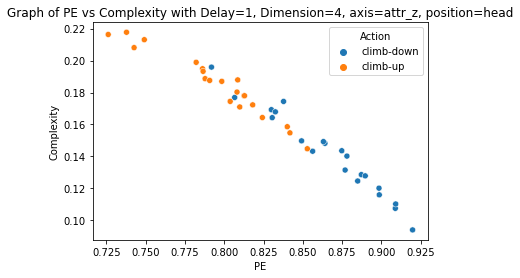

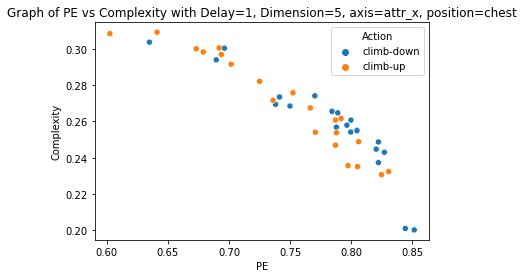

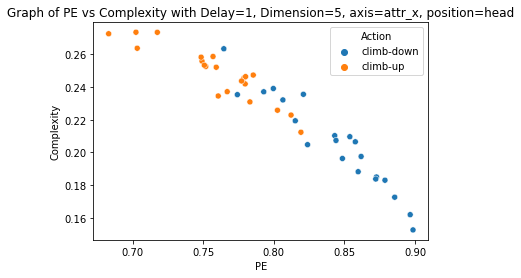

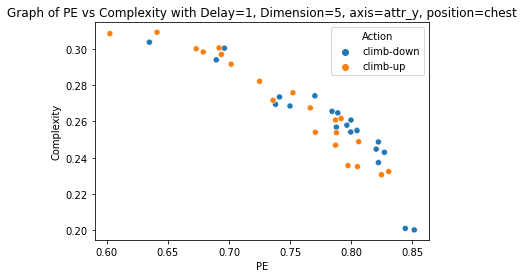

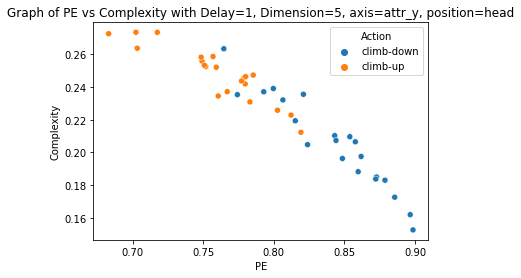

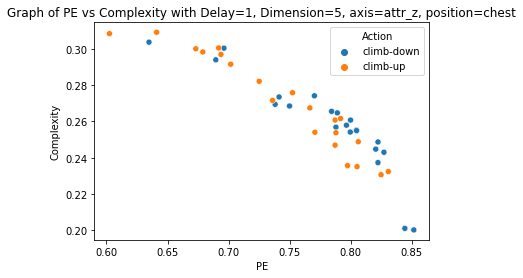

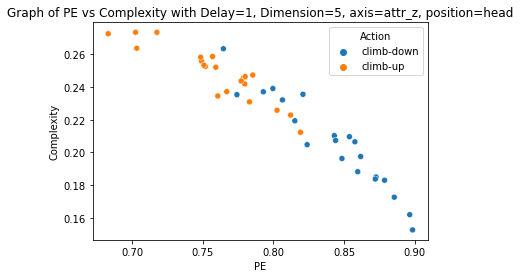

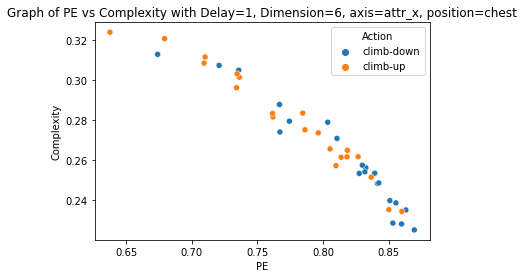

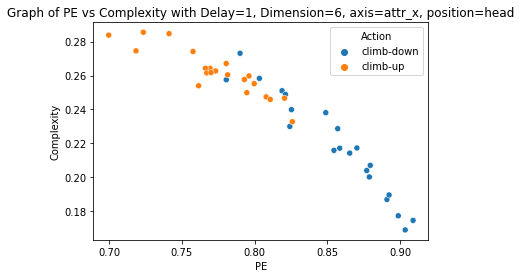

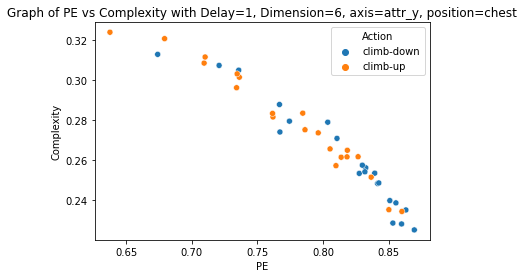

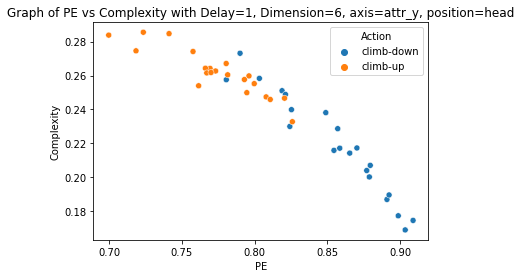

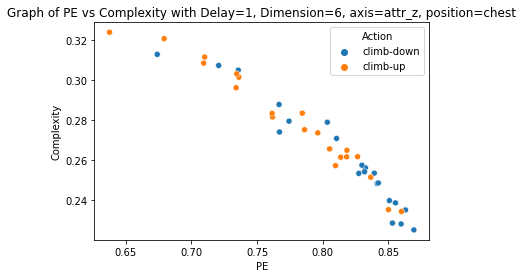

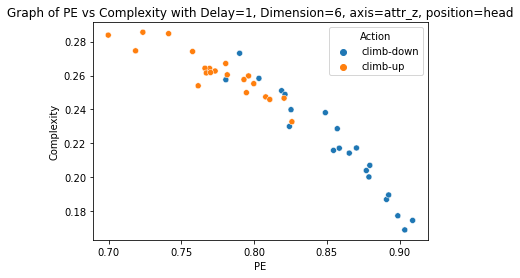

In [34]:
''' Generating the scatter plots:  permutation entropy vs complexity and coloring the points
according to climbing-up and climbing-down (for signal length =4096, embedded delay = 1,
and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions) '''

positionn = ['chest', 'head']
dimension = [3,4,5,6]
axiss = ['attr_x', 'attr_y', 'attr_z']
count = 0
for i in dimension:
  for j in axiss:
    for k in positionn:
      df_graph = df_graph2[((df_graph2['dimension']==i) & (df_graph2['axis']==j) & (df_graph2['Position']==k))]
      sns.scatterplot(data=df_graph, x='PE', y='Complexity', hue='Action')
      plt.title("Graph of PE vs Complexity with Delay=1, Dimension=" + str(i) + ", axis=" + str(j) + ", position=" + str(k))
      plt.show()

In [36]:
! jupyter nbconvert --to html project2.ipynb

[NbConvertApp] Converting notebook project2.ipynb to html
[NbConvertApp] Writing 2097604 bytes to project2.html
